# Introduction to Data Science: Football Worldcup Data Analysis

In [1]:
# Importing all the modules required
import numpy as np                  # numpy for linear algebra operations
import pandas as pd                 # pandas for datafile processing
import matplotlib.pyplot as plt     # matplotlib for data visualization
import seaborn as sns               # also for data visualation (graphs etc.)
%matplotlib inline
import plotly as py                 # for data visualisation (it supports a huge variety of plotable charts)
import cufflinks as cf  # it connects plotly with pandas so that we can create charts directly on data frames

C:\Users\conta\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
# Importing the datasets
players = pd.read_csv("C:/Users/conta/OneDrive/Desktop/Projects/Data Analysis (World Cup)/Data/WorldCupMatches.csv")
matches = pd.read_csv("C:/Users/conta/OneDrive/Desktop/Projects/Data Analysis (World Cup)/Data/WorldCupMatches.csv")
world_cup = pd.read_csv("C:/Users/conta/OneDrive/Desktop/Projects/Data Analysis (World Cup)/Data/WorldCups.csv")

In [5]:
#First 5 rows of the players dataset
players.head()

# If we want, we can specify a number to get the first 'n' rows as well.
# Example, players.head(20)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
# First 5 rows of matches dataset
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [7]:
# The last 5 entries in the matches dataset

matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# First 5 rows of worldcup dataset

world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


## Data Cleaning

##### Our datasets contain various entries in which there is no data. So, we will remove (clean) those rows which contain NULL values.

In [9]:
matches.dropna(subset=['Year'], inplace=True)

# It removes all entries where the 'Year' column had NULL values

In [10]:
matches.tail()

# You can see the dataset after data cleaning

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [11]:
# Getting the value count in a dataset (meaning how many time a specific value has been repeated)
matches['Home Team Name'].value_counts()

Brazil                      82
Italy                       57
Argentina                   54
Germany FR                  43
England                     35
                            ..
Jamaica                      1
Bolivia                      1
New Zealand                  1
Iran                         1
rn">United Arab Emirates     1
Name: Home Team Name, Length: 78, dtype: int64

In [12]:
matches['Home Team Goals'].value_counts()

1.0     246
2.0     205
0.0     177
3.0     116
4.0      59
5.0      17
6.0      17
7.0       8
8.0       4
9.0       2
10.0      1
Name: Home Team Goals, dtype: int64

In [13]:
# Some Home Teams include unrequired characters.

names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

names

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Bosnia and Herzegovina    1
rn">Serbia and Montenegro     1
rn">Trinidad and Tobago       1
Name: Home Team Name, dtype: int64

In [14]:
# Creating a new list with wrong names of the Home Teams (they include the 'rn">' in the beginning)

wrong = list(names.index)

wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Bosnia and Herzegovina',
 'rn">Serbia and Montenegro',
 'rn">Trinidad and Tobago']

In [15]:
# Removing the 'rn">' from the names. We do not require it.

correct = [name.split('>')[1] for name in wrong]

correct

['Republic of Ireland',
 'United Arab Emirates',
 'Bosnia and Herzegovina',
 'Serbia and Montenegro',
 'Trinidad and Tobago']

In [16]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana'] # These teams also have some character malfunctioning in them.
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium'] # These are the corrected names

In [17]:
wrong = wrong + old_name #Adding oldname to the wrong names list
correct = correct + new_name #Adding newname to the correct names list

In [18]:
wrong # Displaying the updated wrong team names list

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Bosnia and Herzegovina',
 'rn">Serbia and Montenegro',
 'rn">Trinidad and Tobago',
 'Germany FR',
 'Maracan� - Est�dio Jornalista M�rio Filho',
 'Estadio do Maracana']

In [19]:
correct # Displaying the updated correct team names list

['Republic of Ireland',
 'United Arab Emirates',
 'Bosnia and Herzegovina',
 'Serbia and Montenegro',
 'Trinidad and Tobago',
 'Germany',
 'Maracan Stadium',
 'Maracan Stadium']

In [20]:
# Replacing wrong values with corrected ones in players, matches and worldcup datasets

for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [21]:
# Checking if there are still any wrong entries listed in the dataset

names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

## Most Number of World Cup Winning Title

In [22]:
# Counting the number of times each country has appeared as the 'Winner' in the worldcup dataset

winner = world_cup['Winner'].value_counts()

winner

Brazil       5
Germany      4
Italy        4
Argentina    2
Uruguay      2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [23]:
# Counting the number of times each country has appeared as the 'Runner Up' in the worldcup dataset

runnerup = world_cup['Runners-Up'].value_counts()

runnerup

Germany           4
Netherlands       3
Argentina         3
Italy             2
Czechoslovakia    2
Hungary           2
Brazil            2
France            1
Sweden            1
Name: Runners-Up, dtype: int64

In [24]:
# Counting the number of times each country has appeared as the 'Third' in the worldcup dataset

third = world_cup['Third'].value_counts()

third

Germany        4
France         2
Poland         2
Sweden         2
Brazil         2
Austria        1
Chile          1
Croatia        1
Portugal       1
USA            1
Turkey         1
Italy          1
Netherlands    1
Name: Third, dtype: int64

In [25]:
# Creating a new table listing the all the above values

teams = pd.concat([winner, runnerup, third], axis=1)     # Concating the three values with the heading
teams.fillna(0, inplace=True)   # Replaces the NULL values with a 0
teams = teams.astype(int)       # Converts all dtypes to int

teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Argentina,2,3,0
Uruguay,2,0,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [26]:
# Importing iplot from plotly and connecting it to offline mode

from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [27]:
teams.iplot(kind = 'bar', xTitle='Teams', yTitle='World Cup Winning Count', title='FIFA World Cup Winning Count')

## Number of Goal Per Countary

In [28]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [29]:
# Cleaning the NULL fields from Teams and Goals and storing output to new lists

home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [30]:
# Setting the columns as 'Countries' and 'Goals' for home and away teams

home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [31]:
# Creating a new list combining both values from home and away

goals = home.append(away, ignore_index = True)

In [32]:
# Grouping the countries by total goals they have scored (as home teams + as away teams)

goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [33]:
# Sorting the list in descending order (most to less goals)

goals = goals.sort_values(by = 'Goals', ascending=False)

goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [34]:
# Plotting graph for the most number of goals by countries
# Note that we are only displaying the top 30 countries from the list

goals[:30].iplot(kind='bar', xTitle = 'Country', yTitle = 'Number of Goals', title = 'Countries Hits Number of Goals')

## Attendance, Number of Teams, Goals, and Matches per Cup

In [35]:
# Removing the decimals from the attendance column

world_cup['Attendance'] = world_cup['Attendance'].str.replace(".", "")

<ipython-input-35-0d5c66ba50cf>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [36]:
world_cup.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


Text(0.5, 1.0, 'Matches Plyed Scored by Teams Per Year')

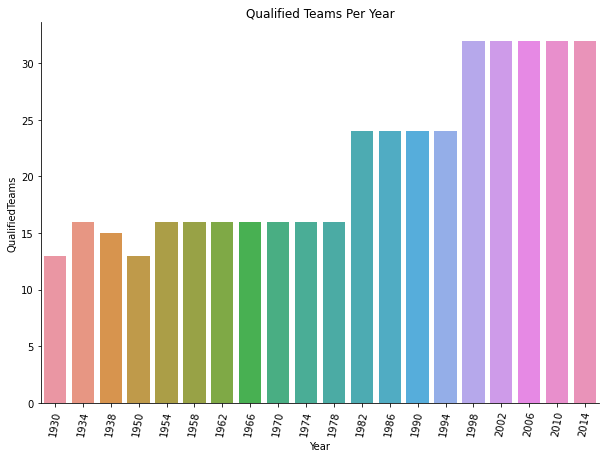

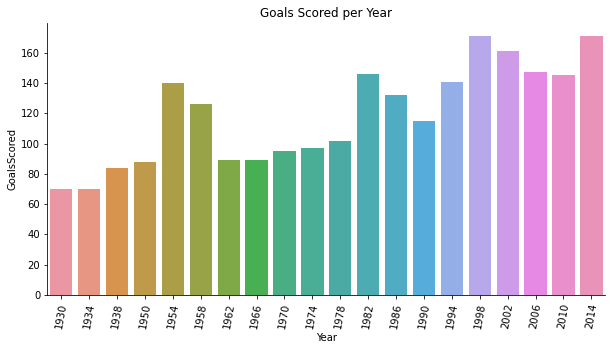

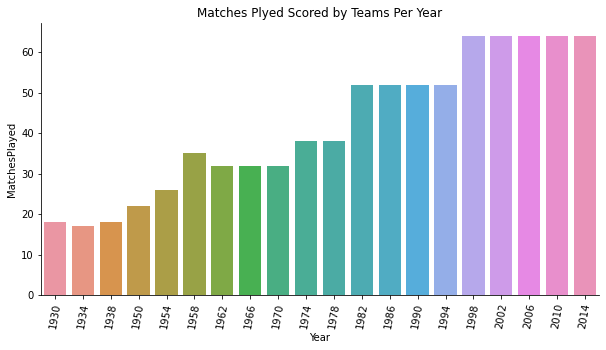

In [37]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')

#======================

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored per Year')

#======================

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Plyed Scored by Teams Per Year')

# Goals Per Team Per World Cup

In [38]:
# Creating a new list which stores the grouped Year and Home teams
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()

home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [39]:
# Similarly, creating a list for away teams (which also stores goals scored by grouping them by team and then adding the total)
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [40]:
# New list 'goals' which concats 'home' and 'away' teams
goals = pd.concat([home, away], axis=1)
# Replace all NULL values with 0
goals.fillna(0, inplace=True)
# Adding the home and away team goals
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
# Removing the Home Team Goals and Away Team Goals titles from list 'goals'
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)


goals

Goals
Year                     
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            6.0
       Uruguay        4.0

[427 rows x 1 columns]

In [41]:
# Reset the list index to default(default starts from 0)
goals = goals.reset_index()

In [42]:
# Adding column headers
goals.columns = ['Year', 'Country', 'Goals']

# Sort list to ascending (by year) and in descending (by goal)
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])

goals



,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
416,2014.0,Japan,2.0
422,2014.0,Russia,2.0
401,2014.0,Cameroon,1.0
413,2014.0,Honduras,1.0


In [43]:
# Top 5 goals by each year
top5 = goals.groupby('Year').head()

top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
22,1934.0,Italy,12.0
20,1934.0,Germany,11.0
17,1934.0,Czechoslovakia,9.0
14,1934.0,Austria,7.0
21,1934.0,Hungary,5.0


In [44]:
import plotly.graph_objects as go

In [45]:
x, y = goals['Year'].values, goals['Goals'].values

In [46]:
data = []

# Looping over the top5 list (with removed duplicates)
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']

#     Appending the Bargraphs to the end of data list
    data.append(go.Bar(x = year, y = goal, name = team))
# Cerating a layout with stack as bargraph
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with Most Goals Scored', showlegend = True)
# Creating the bargraph figure (diagram) with 'data' as data list and 'layout' as layout list
fig = go.Figure(data = data, layout = layout)
fig.show()

# Matches With Highest Number Of Attendance

In [47]:
# Converting the date to datetime dtype
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

In [48]:
# Stringifying the date format
# %d - date
# %b - abbrevated month name
# %y - year (YY format)

matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y'))
matches['Datetime']

0      13 Jul, 30
1      13 Jul, 30
2      14 Jul, 30
3      14 Jul, 30
4      15 Jul, 30
          ...    
847    05 Jul, 14
848    08 Jul, 14
849    09 Jul, 14
850    12 Jul, 14
851    13 Jul, 14
Name: Datetime, Length: 852, dtype: object

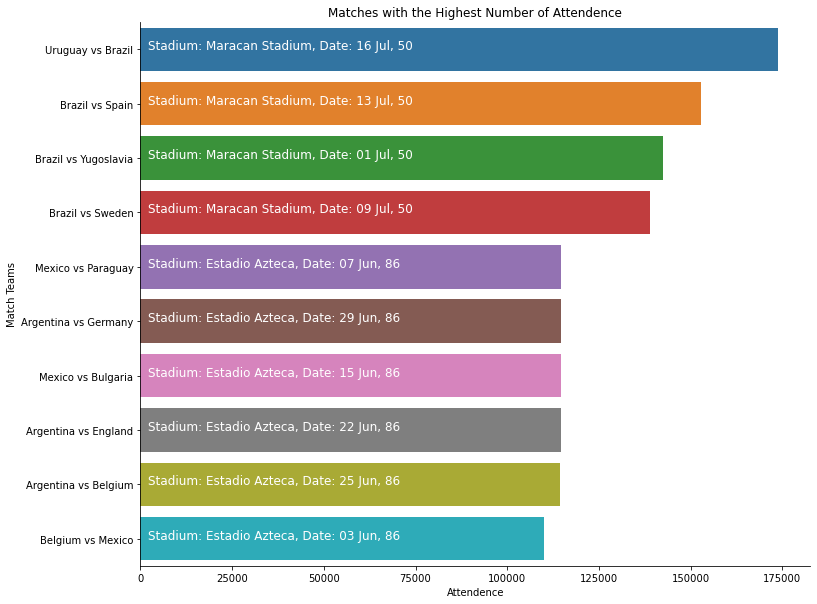

In [49]:
# Sorting the top 10 matches
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

# Creating the plot figure with size (12, 10)
plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the Highest Number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()


# Stadium with Highest Average Attendance

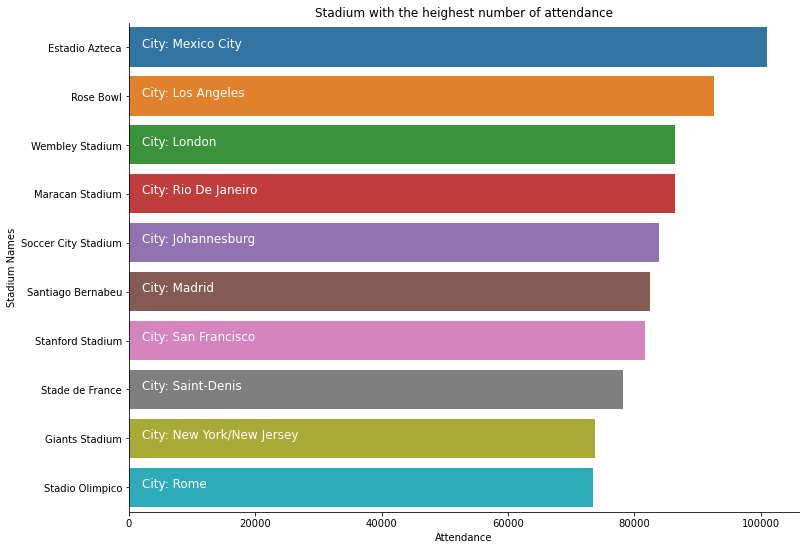

In [50]:
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'white')

plt.show()

In [51]:
# Most matches were played in which cities
matches['City'].value_counts()[:20].iplot(kind = 'bar')

# Which countries had won the cup ?

Text(0.5, 1.0, 'Country-wise Podium Count')

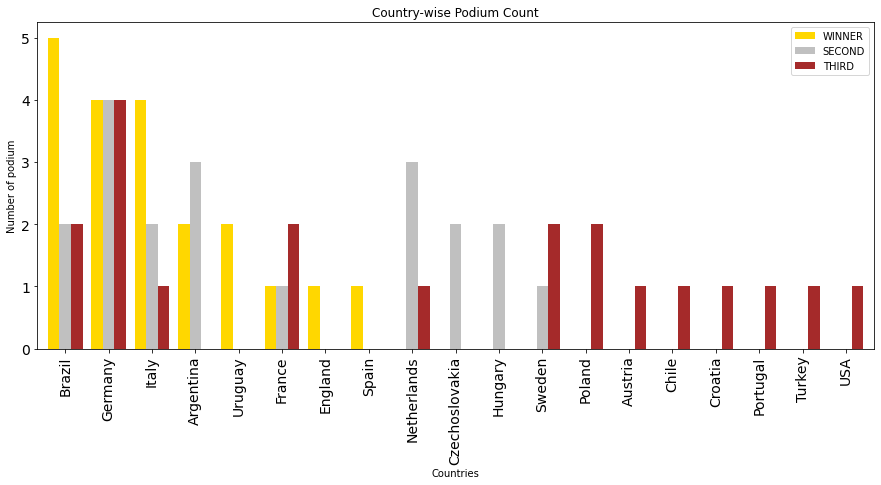

In [52]:
# Creating 3 lists categorising Winner, Runners-Up and Third positions
gold = world_cup["Winner"]
silver = world_cup["Runners-Up"]
bronze = world_cup["Third"]

# Counting values from the lists (we have used from_dict() method as we are creating a list from dict type)
gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())

# Performing Outer join
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
# Filling NULL values with 0
podium_count = podium_count.fillna(0)
# Adding column titles
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
# Converting the dtype of list to int64
podium_count = podium_count.astype('int64')
# Sorting values in descending order
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

# Plotting the bargraph
podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar",
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Country-wise Podium Count')

Text(0.5, 1.0, 'Top 10 of Number of goals by country')

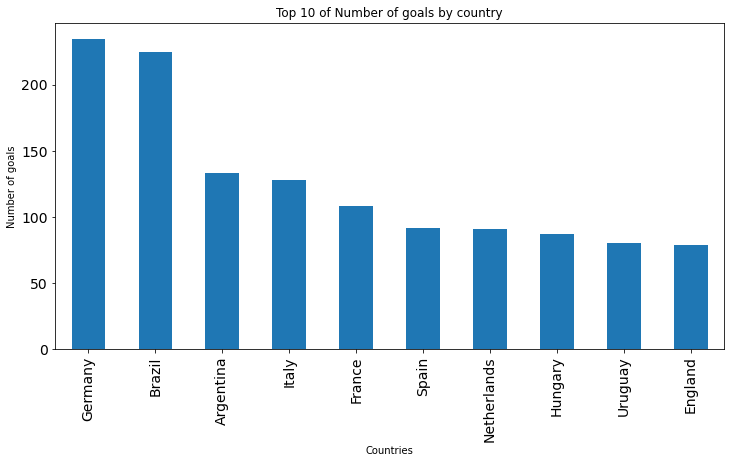

In [53]:
# Removing NULL values
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
# Removing NULL values
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

# Creating a new DataFrame with countires and goals
goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
# Appending away to home and then assigning the resultant to goal_per_country dataframe
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

# Converting the dtype of goals
goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

# Grouping the countries by country name, adding the goal values and then sorting them in descending order
goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

# Plotting the graph
goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')

# Match outcome by home and away teams

In [54]:
# Creating a function get_labels() which takes in a match as argument and returns if the Home Team has more goals or the Away Team had more goals.
# If both teams scored equally, it returns 'DRAW'
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [61]:
# Creating a new column 'outcome' in matches dataframe and performing the get_labels() function
matches['outcome'] = matches.apply(lambda x: get_labels(x), axis=1)

In [62]:
# Matches dataframe after executing get_label() function
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcome
0,1930,"13 Jul, 30",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,"13 Jul, 30",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,"14 Jul, 30",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,"14 Jul, 30",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,"15 Jul, 30",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [63]:
# Counting the total result of matchs played
match_outcomes = matches['outcome'].value_counts()
match_outcomes

Home Team Win    488
DRAW             190
Away Team Win    174
Name: outcome, dtype: int64

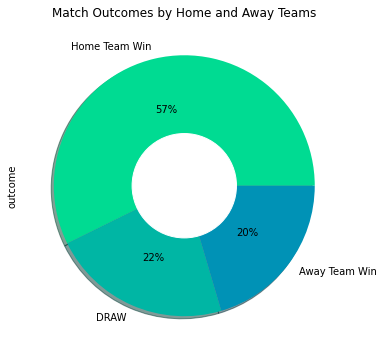

In [64]:
# Plotting graph on match_outcomes
plt.figure(figsize = (6,6))

match_outcomes.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()